<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Illustrating directed networks with food webs

_Author: Christoph Rahmede (LDN)_

--- 

<a id="learning-objectives"></a>
### Learning Objectives

- Construct a directed graph from data
- Analyze the different components of a directed graph

## Lesson Guide

- [Directed graphs](#directed-graphs)
- [Constructing the graph](#constructing)
- [Plotting the graph](#plotting)
- [Degree distribution](#degree)
- [Determining the components](#components)
- [Plotting the bowtie graph](#bowtie)
- [Classifying the species](#classify)
- [Conclusion](#conclusion)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id="directed-graphs"></a>
## Directed graphs

In directed networks, the nodes have an in-degree (how many edges are pointing towards them) and an out-degree (with how many edges they are pointing at other nodes).

The nodes in connected directed graphs can be distinguished in the following groups:

#### 1. The strongly connected component (SCC):
    - nodes that can mutually reach each other

#### 2. The in-component:

    - nodes from which the SCC can be reached but which cannot be reached from the SCC

#### 3. The out-component:

    - nodes from which the SCC cannot be reached but which can be reached from the SCC

#### 4. In/out-tendrils:

    - nodes which are only connected to the in/out-component respectively
    
#### 5. Tubes:

    - nodes reachable from the in-component and able to reach the out-component but which do not have any links to the SCC

To illustrate this, we choose the foodweb from the Ythan Estuary in Scotland. The Ythan estuary food web describes an ecological system by predator prey relations consisting of
mostly birds, ﬁshes, invertebrates (all nodes 43 to 134), and metazoan parasites (nodes 1 to 42) in a Scottish Estuary,
for example (43: Otter, 44: Cormorant, 45: Heron, ..., 87: Trout),
see the full list [here](assets/datasets/Ythan_estuary_species.txt).

<p><a href="https://commons.wikimedia.org/wiki/File:Mid_to_upper_reach_of_Ythan_Estuary_looking_west,_Aberdeenshire.jpg#/media/File:Mid_to_upper_reach_of_Ythan_Estuary_looking_west,_Aberdeenshire.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Mid_to_upper_reach_of_Ythan_Estuary_looking_west%2C_Aberdeenshire.jpg/1200px-Mid_to_upper_reach_of_Ythan_Estuary_looking_west%2C_Aberdeenshire.jpg" alt="Mid to upper reach of Ythan Estuary looking west, Aberdeenshire.jpg" style="width:500px;height:400px;"></a><br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Anlace&amp;action=edit&amp;redlink=1" class="new" title="User:Anlace (page does not exist)">C. Michael Hogan</a> - Own work by the original uploader, <a href="https://creativecommons.org/licenses/by-sa/2.5" title="Creative Commons Attribution-Share Alike 2.5">CC BY-SA 2.5</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=42905149">Link</a></p>

Nodes are the various species living in that estate and directed links indicate which species eats which one.
There are species which are only prey (basal species), species which are prey as well as predator (intermediate species), and species which are only predator (top species). The node 0 stands for the environment. It indicates that some species do not prey to live, however itself it does not represent a species and is therefore dropped.

The original reference appeared in [JSTOR](http://www.jstor.org/stable/3546201?seq=1#page_scan_tab_contents),
see also the [cosinproject](http://www.cosinproject.eu/extra/data/foodwebs/WEB.html). 
This example stems from the book
* Guido Caldarelli, Alessandro Chessa: Data Science and Complex Networks, Oxford University Press, 2016 (http://book.complexnetworks.net/).

<a id="constructing"></a>
## Constructing the graph

In [2]:
#df = pd.read_table('http://www.cosinproject.eu/extra/data/foodwebs/ythan.txt',sep=' ',header=None)
df = pd.read_table('assets/datasets/Ythan_Estuary.txt',sep=' ',header=None)
df.drop([0],axis=1,inplace=True)
df.drop(df.index[df[1]==0],inplace=True)
print(df.head())

DG = nx.DiGraph()
DG.add_edges_from(df.values)

print(nx.info(DG))
print("The graph is directed:", DG.is_directed())

    1   2
5  44   1
6  44   9
7  45  22
8  46  15
9  46  19
Name: 
Type: DiGraph
Number of nodes: 134
Number of edges: 596
Average in degree:   4.4478
Average out degree:   4.4478
The graph is directed: True


<a id="plotting"></a>
## Plotting the graph

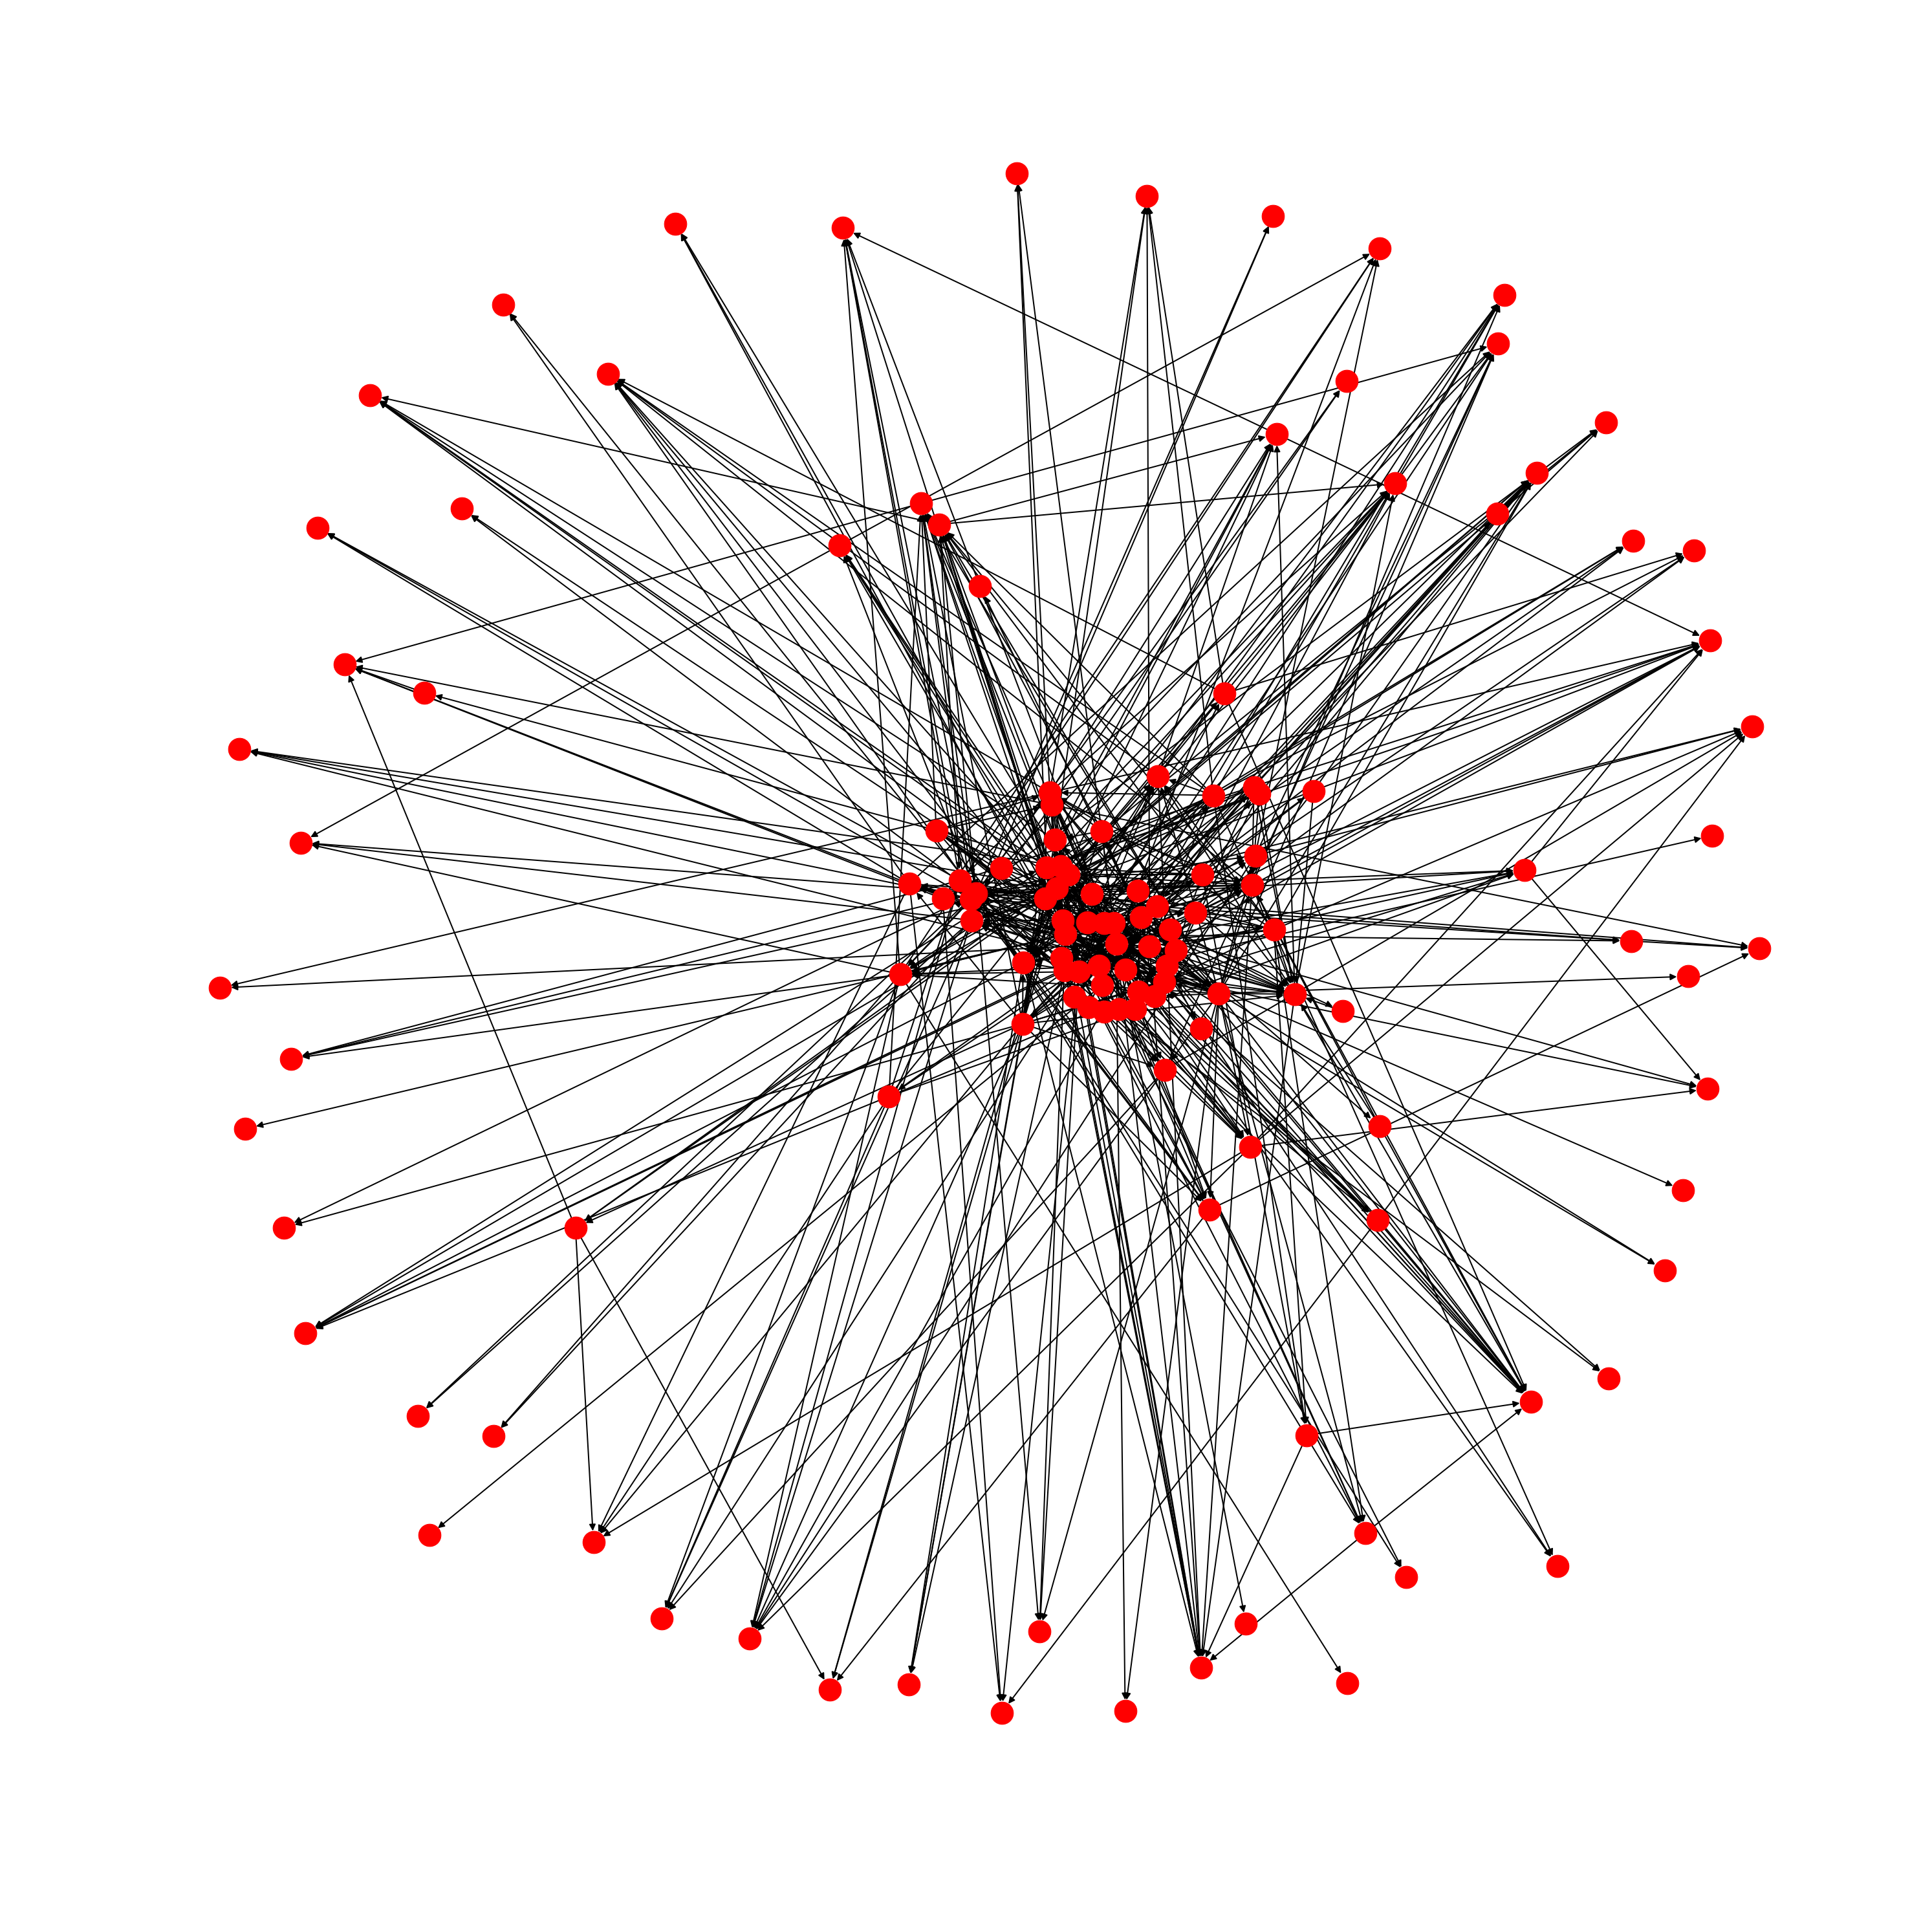

In [3]:
plt.figure(figsize=(20,20))
nx.draw(DG)

In [4]:
print(nx.info(DG))

Name: 
Type: DiGraph
Number of nodes: 134
Number of edges: 596
Average in degree:   4.4478
Average out degree:   4.4478


<a id="degree"></a>
## Degree distribution

The in-degree indicates on how many other species a given species preys, whereas the out-degree indicates by how many species it is preyed on. For example for the otter (node 43), we have:

In [5]:
print(DG.in_degree(43))
print(DG.out_degree(43))

6
0


<p><a href="https://commons.wikimedia.org/wiki/File:Fischotter,_Lutra_Lutra.JPG#/media/File:Fischotter,_Lutra_Lutra.JPG"><img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Fischotter%2C_Lutra_Lutra.JPG" alt="Fischotter, Lutra Lutra.JPG" ></a><br>By Bernard Landgraf - <span class="int-own-work" lang="en" xml:lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=41335">Link</a></p>

We get the following degree distributions.

The species with out-degree zero don't have any natural enemies.
Those with in-degree zero do not prey on other species at all.

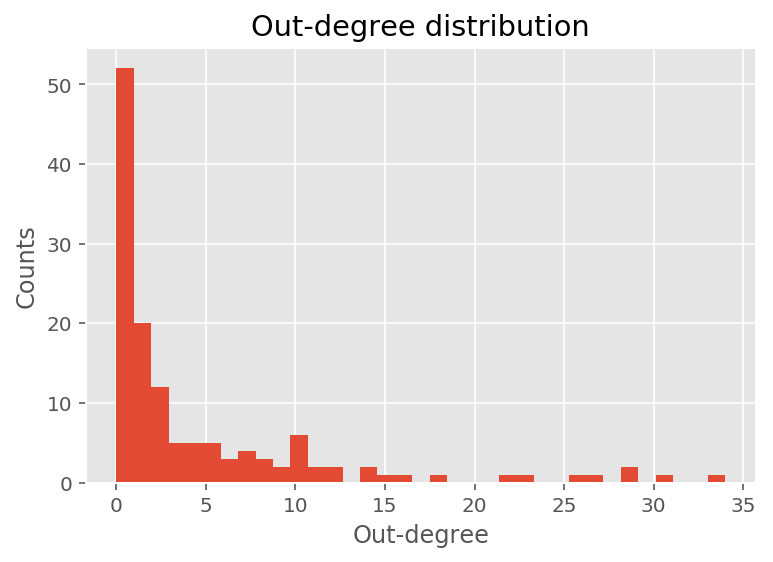

In [6]:
plt.hist(list(dict(DG.out_degree()).values()),bins=35)
#plt.hist(np.array(nx.adjacency_matrix(DG).sum(axis=1))[:,0],bins=35)
plt.xlabel('Out-degree')
plt.ylabel('Counts')
plt.title('Out-degree distribution')
plt.show()

The top preys are the following:

In [7]:
sorted(list(DG.out_degree()),key=lambda x: x[1],reverse=True)[:20]

[(134, 34),
 (101, 31),
 (103, 29),
 (116, 29),
 (90, 27),
 (89, 26),
 (85, 23),
 (123, 22),
 (88, 18),
 (98, 16),
 (117, 15),
 (95, 14),
 (97, 14),
 (96, 12),
 (133, 12),
 (71, 11),
 (77, 11),
 (61, 10),
 (70, 10),
 (81, 10)]

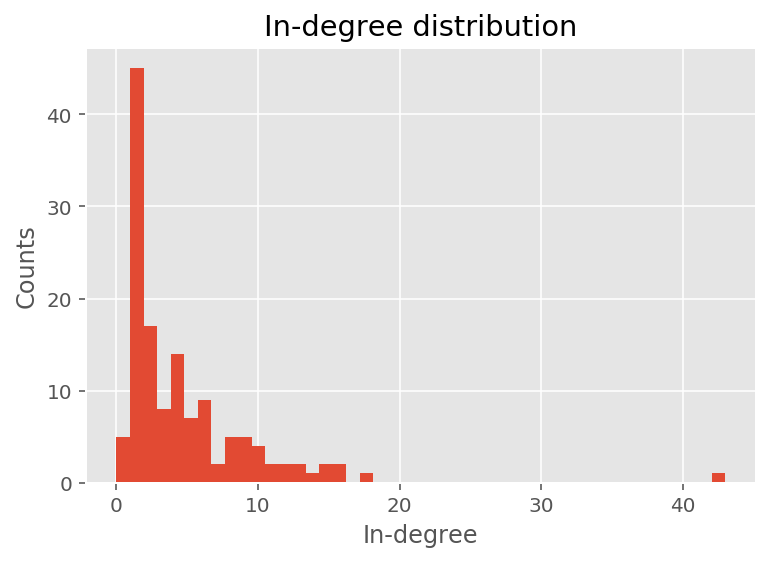

In [8]:
plt.hist(list(dict(DG.in_degree()).values()),bins=45)
#plt.hist(np.array(nx.adjacency_matrix(DG).sum(axis=0))[0],bins=45)
plt.xlabel('In-degree')
plt.ylabel('Counts')
plt.title('In-degree distribution')
plt.show()

The top ten predators are the following:

In [9]:
sorted(list(DG.in_degree()),key=lambda x: x[1],reverse=True)[:10]

[(85, 43),
 (80, 18),
 (77, 16),
 (84, 16),
 (5, 15),
 (79, 15),
 (88, 14),
 (32, 13),
 (78, 13),
 (76, 12)]

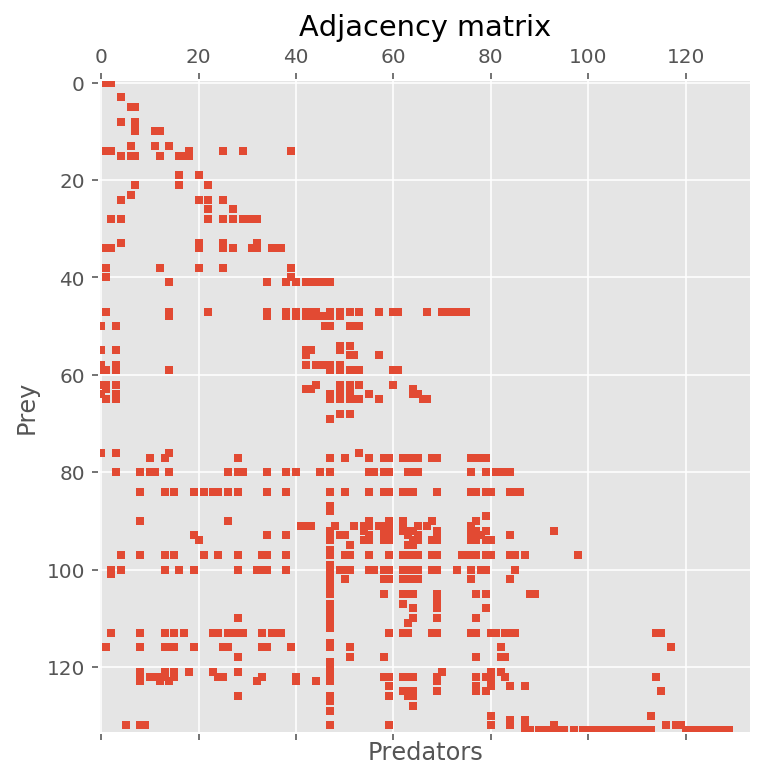

In [10]:
plt.figure(figsize=(6,6))
plt.spy(nx.adjacency_matrix(DG),markersize=3)
plt.xlabel('Predators')
plt.ylabel('Prey')
plt.title('Adjacency matrix')
plt.show()

Now we determine the largest strongly connected component (for this network, there is only one containing more than one node) and its in and out-components. We can depict that with a characteristic bow-tie structure.

<a id="components"></a>
## Determining the strongly connected component, the in-component and the out-component

In [11]:
scc = list(max(nx.strongly_connected_components(DG), key=len))
IN_component = [list(DG.predecessors(n)) for n in scc]
IN_component = sorted(list(set(np.unique(np.concatenate(IN_component))) - set(scc)))

OUT_component = [list(DG.successors(n)) for n in scc]
OUT_component = sorted(list(set(np.unique(np.concatenate(OUT_component))) - set(scc)))

In [12]:
#generating the subgraph
bowtie = scc + IN_component + OUT_component

These three groups contain only a subset of all the nodes:

In [13]:
print(len(scc))
print(len(IN_component))
print(len(OUT_component))
print(len(bowtie))

2
12
37
51


The two species in the strongly connected component are the brown shrimp and the ragworm.


<p><a href="https://commons.wikimedia.org/wiki/File:Crangon_crangon.jpg#/media/File:Crangon_crangon.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Crangon_crangon.jpg/1200px-Crangon_crangon.jpg" alt="Crangon crangon.jpg" style="width:400px;height:300px;"></a><br>By © Hans Hillewaert, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=470098">Link</a></p>

<p><a href="https://commons.wikimedia.org/wiki/File:Nereis_diversicolor_1.jpg#/media/File:Nereis_diversicolor_1.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Nereis_diversicolor_1.jpg" alt="Nereis diversicolor 1.jpg" style="width:400px;height:300px;"></a><br>By <a href="//commons.wikimedia.org/wiki/User:M.Buschmann" title="User:M.Buschmann">User:M.Buschmann</a> - Image:Nereis diversicolor.jpg, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=1184031">Link</a></p>

<a id="bowtie"></a>
## Plotting the bowtie graph

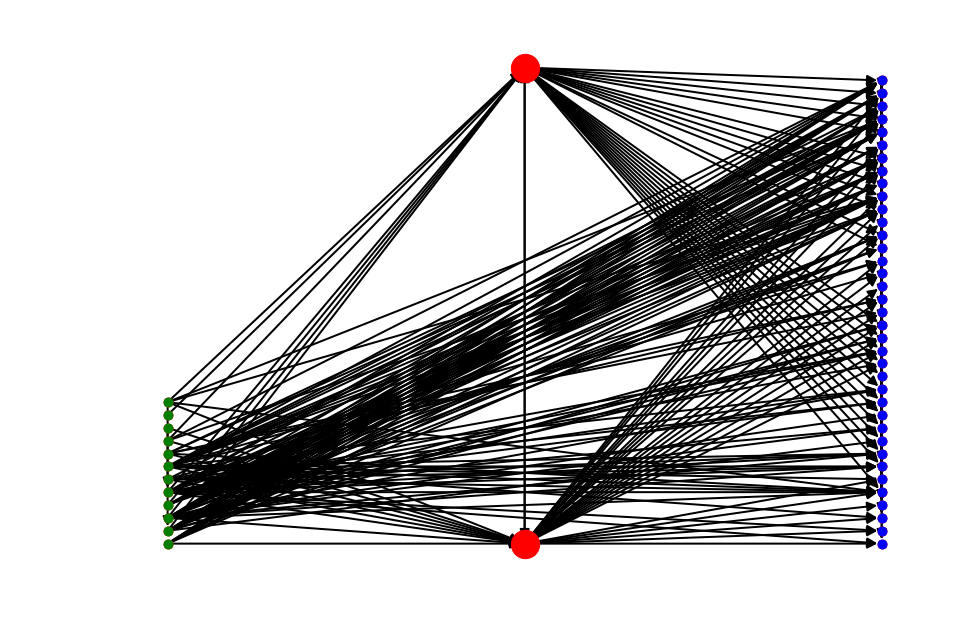

In [14]:
DG_bowtie = DG.subgraph(bowtie)

#defining the proper layout
pos = {}
in_y_0 = 100
in_y = in_y_0
pos[scc[0]] = (150, in_y)

in_step = 1000
for in_n in IN_component:
    pos[in_n] = (100, in_y)
    in_y += in_step

out_y = 100
out_step = 1000   
for out_n in OUT_component:
    pos[out_n] = (200, out_y)
    out_y += out_step

sccpos = np.linspace(in_y_0,out_y,len(scc))
i = 0
for scc_n in scc:
    pos[scc_n] = (150, sccpos[i])
    i += 1
#plot the bowtie structure
nx.draw(DG_bowtie, pos, node_size=20, arrows=True)

nx.draw_networkx_nodes(DG_bowtie, pos, IN_component, node_size=20, node_color='green')
nx.draw_networkx_nodes(DG_bowtie, pos, OUT_component, node_size=20, node_color='blue')
nx.draw_networkx_nodes(DG_bowtie, pos, scc, node_size=200, node_color='red')
plt.show()

<a id="classify"></a>
## Classifying the species

Now we compute to which type of species each node belongs. There are species which are only prey (basal species), species which are prey as well as predator (intermediate species), and species which are only predator (top species). This can be decided by the values of the in and out-degrees.

In [15]:
def compute_classes(DG):
    basal_species = []
    top_species = []
    intermediate_species = []
    for n in DG.nodes():
        if DG.in_degree(n) == 0:
            basal_species.append(n)
        elif DG.out_degree(n)== 0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
    return (basal_species,intermediate_species,top_species)

(B,I,T) = compute_classes(DG)
number_of_nodes = (len(B)+len(T)+len(I))
print("Basal:", float(len(B))/ number_of_nodes)
print("Intermediate:", float(len(I))/ number_of_nodes)
print("Top:", float(len(T))/ number_of_nodes)

Basal: 0.03731343283582089
Intermediate: 0.5746268656716418
Top: 0.3880597014925373


We can calculate the proportion between the number of links between species of different classes and the total number of links, furthermore the ratio between the numbers of animals which are prey and those which are predator.

In [16]:
def InterclassLinkProportion(DG,C1,C2):
    count = 0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1,n2):
                count += 1
    return float(count)/DG.number_of_edges()
    
print("links in BT:", InterclassLinkProportion(DG,B,T))
print("links in BI:", InterclassLinkProportion(DG,B,I))
print("links in IT:", InterclassLinkProportion(DG,I,T))
print("links in II:", InterclassLinkProportion(DG,I,I))
print("links in BB:", InterclassLinkProportion(DG,B,B))
print("links in TT:", InterclassLinkProportion(DG,T,T))

#Ratio prey/predators
print("Prey/Predator ratio:",float((len(B)+len(I)))/(len(I)+len(T)))

links in BT: 0.0
links in BI: 0.08557046979865772
links in IT: 0.37416107382550334
links in II: 0.540268456375839
links in BB: 0.0
links in TT: 0.0
Prey/Predator ratio: 0.6356589147286822


<a id="conclusion"></a>
## Conclusion

- Directed networks split into different parts according to which nodes can be reached from which nodes
- We distinguish nodes by their in/out-degree
- We distinguish 
    - The strongly connected component
    - The in-component
    - The out-component
    - Tubes
    - In/out tendrils